In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [7]:
df.drop("Unnamed: 0",axis=1,inplace =True)

In [9]:
df.sample(2)

,TV,radio,newspaper,sales
121,18.8,21.7,50.4,7.0
57,136.2,19.2,16.6,13.2


In [10]:
#features and target variable(X,y)
X = df.drop('sales',axis = 1)
y=df['sales']

In [13]:
#training and testing the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
model= LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
predication = model.predict(X_test)

In [18]:
predication

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [19]:
#lest check the mse and rmse 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae= mean_absolute_error(y_test,predication)
mae

np.float64(1.2137457736144805)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test,predication))
rmse

np.float64(1.5161519375993877)

In [22]:
test_residual = y_test-predication

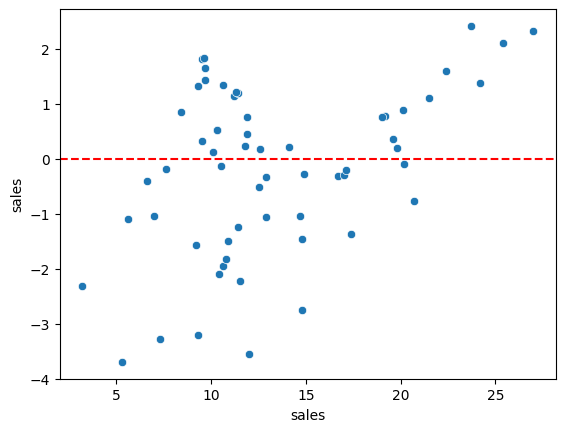

In [25]:
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0,ls='--',color='red')

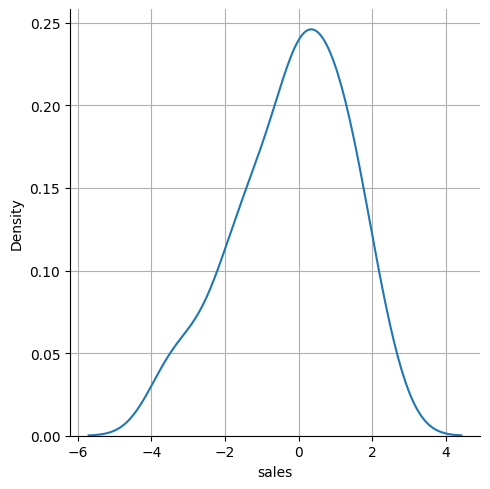

In [34]:
sns.displot(x=test_residual,kind='kde')
plt.grid()

In [37]:
final_model=LinearRegression()


In [38]:
final_model

LinearRegression()

In [39]:
final_model.fit(X,y)
y_hat=final_model.predict(X)

In [40]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

**Deploying the model**



In [45]:
from joblib import dump, load

In [53]:
dump(model,"advertising_model.joblib")

['advertising_model.joblib']

In [57]:
loaded_model= load("advertising_model.joblib")
loaded_model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

- lets say someone asks me to predict as:
- what sales will I make if I spend 200 units in TV, 400 units in radio and 50 units in newspaper?

In [60]:
campaign=[[200,400,50]]
loaded_model.predict(campaign)

C:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87.10086851])

- with the RMSE of 1.360 I can conclude that
- with the spend of unit as tv->200,radio->400 and newspaper -> 50
- I can make $87 \pm.360 \sim 88 \ to \  86 $ sales

In [61]:
model.score(X_test,y_test)

0.9185780903322446